In [1]:
%pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [langgraph]
Note: you may need to restart the kernel to use updated packages.


In [3]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os

load_dotenv()  # .env 파일 로드
api_key = os.getenv("OPENAI_API_KEY")

model = ChatOpenAI(
    model="gpt-4o-mini",
    api_key=api_key  # 환경 변수에서 가져온 키 전달
)

response = model.invoke("안녕하세요!")
print(response)


content='안녕하세요! 어떻게 도와드릴까요?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 10, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BX0YJ3stDXREmkTJmEeYUH2HL2dNd', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--2af66ec0-178d-46be-9c3b-d92534e975d0-0' usage_metadata={'input_tokens': 10, 'output_tokens': 11, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [5]:
from typing import Annotated # annotated는 타입 힌트를 사용할 때 사용하는 함수
from typing_extensions import TypedDict # TypedDict는 딕셔너리 타입을 정의할 때 사용하는 함수

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):	#①
    """
    State 클래스는 TypedDict를 상속받습니다.

    속성:
        messages (Annotated[list[str], add_messages]): 메시지들은 "list" 타입을 가집니다.   #②
       'add_messages' 함수는 이 상태 키가 어떻게 업데이트되어야 하는지를 정의합니다.  #③
        (이 경우, 메시지를 덮어쓰는 대신 리스트에 추가합니다)
    """
    messages: Annotated[list[str], add_messages]	#②

# StateGraph 클래스를 사용하여 State 타입의 그래프를 생성합니다.
graph_builder = StateGraph(State) #④

In [6]:
def generate(state: State):	#①
    """
    주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.

    매개변수:
    state (State): 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있습니다.
		
    반환값:
    dict: 모델이 생성한 응답 메시지를 포함하는 딕셔너리. 
          형식은 {"messages": [응답 메시지]}입니다.
    """ 
    return {"messages": [model.invoke(state["messages"])]}	#②

graph_builder.add_node("generate", generate)	#③

In [7]:
graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)    

graph = graph_builder.compile()

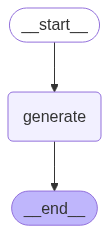

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception: 
    pass

In [9]:

response = graph.invoke({"messages": ["안녕하세요! 저는 김문기입니다"]})

print(type(response))
response

<class 'langgraph.pregel.io.AddableValuesDict'>


{'messages': [HumanMessage(content='안녕하세요! 저는 김문기입니다', additional_kwargs={}, response_metadata={}, id='dcec1cf8-d9dd-4486-8a5e-2e6e77146803'),
  AIMessage(content='안녕하세요, 김문기님! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 15, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BX0acNIUK6TqnD8k9LlHjrJaikTsu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--814177b3-0a0a-405e-969e-5352fbf1f9d2-0', usage_metadata={'input_tokens': 15, 'output_tokens': 16, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [10]:
response["messages"].append("제 이름을 아시나요?")
graph.invoke(response)

{'messages': [HumanMessage(content='안녕하세요! 저는 김문기입니다', additional_kwargs={}, response_metadata={}, id='dcec1cf8-d9dd-4486-8a5e-2e6e77146803'),
  AIMessage(content='안녕하세요, 김문기님! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 15, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BX0acNIUK6TqnD8k9LlHjrJaikTsu', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--814177b3-0a0a-405e-969e-5352fbf1f9d2-0', usage_metadata={'input_tokens': 15, 'output_tokens': 16, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='제 이름을 

In [11]:

inputs = {"messages": [("human", "한국과 일본의 관계에 대해 자세히 알려줘")]}
for chunk, _ in graph.stream(inputs, stream_mode="messages"):
    print(chunk.content, end="")

한국과 일본의 관계는 역사적으로 복잡하고 다양한 측면을 가지고 있습니다. 이 두 나라는 지리적으로 가까운 이웃이지만, 역사적 사건과 문화적 차이로 인해 갈등과 협력이 반복되어왔습니다. 다음은 한국과 일본의 관계를 이해하는 데 도움이 되는 주요 요소들입니다.

### 역사적 배경

1. **고대 및 중세**
   - 한국과 일본은 오랜 역사 동안 서로 영향을 주고받았습니다. 한국의 농업 기술, 문자, 불교 등이 일본에 전파되었습니다. 
   - 그러나 양국 사이에는 무역과 외교적 교류뿐만 아니라 전쟁과 갈등도 존재했습니다.

2. **일제강점기 (1910-1945)**
   - 일본은 1910년에 한국을 강제로 병합하여 35년간 식민지 지배를 하였습니다. 이 시기는 한국인에게 극심한 고통과 억압을 안겼으며, 일본은 한국의 문화와 역사를 억압했습니다.
   - 이 시기에 발생한 여러 사건, 특히 일본 강제 노역, 위안부 문제 등은 오늘날에도 양국 관계에 큰 영향을 미치고 있습니다.

3. **전후 관계**
   - 제2차 세계대전 이후, 한국과 일본은 각각 분단과 독립을 경험했습니다. 1965년 한일국교 정상화가 이루어지면서 경제적 협력 관계가 시작되었습니다.
   - 그러나 과거사에 대한 인식 차이로 인해 갈등이 지속되었습니다.

### 경제적 관계

- **무역과 투자**
  - 한국과 일본은 서로 중요한 무역 파트너입니다. 일본은 한국의 주요 수출입국 중 하나이며, 두 나라의 경제는 서로 밀접하게 연결되어 있습니다.
  - 기술, 자동차, 전자제품 등의 분야에서 협력 관계를 유지하고 있습니다.

### 문화적 교류

- **문화**
  - 한국과 일본은 서로의 문화에 대한 관심이 높습니다. 한류(한국의 대중문화)와 일본의 애니메이션, 만화는 양국에서 많은 인기를 끌고 있습니다.
  - 양국 간의 문화 교류는 긍정적인 측면으로 작용하지만, 때때로 역사적 감정이 이를 가로막기도 합니다.

### 현재의 갈등 요소

1. **역사 문제**
   - 일제 강점기 동